**Given**: the camera matrix, mtx, and the distortion coefficients dist.  
**Goal**:  generate output undistort image and applay transform perspective.  

To do that, you need to write a function that takes your distorted image as input and completes the following steps: 
Undistort the image using cv2.undistort() with mtx and dist
Convert to grayscale 
Find the chessboard corners 
Draw corners 
Define 4 source points (the outer 4 corners detected in the chessboard pattern)
Define 4 destination points (must be listed in the same order as src points!)
Use cv2.getPerspectiveTransform() to get M, the transform matrix
use cv2.warpPerspective() to apply M and warp your image to a top-down view
HINT: Source points are the x and y pixel values of any four corners on your chessboard, you can extract these from the corners array output from cv2.findChessboardCorners(). Your destination points are the x and y pixel values of where you want those four corners to be mapped to in the output image.

If you run into any errors as you run your code, please refer to the Examples of Useful Code section in the previous video and make sure that your code syntax matches up! For this example, please also refer back to the examples in the Calibrating Your Camera video

In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

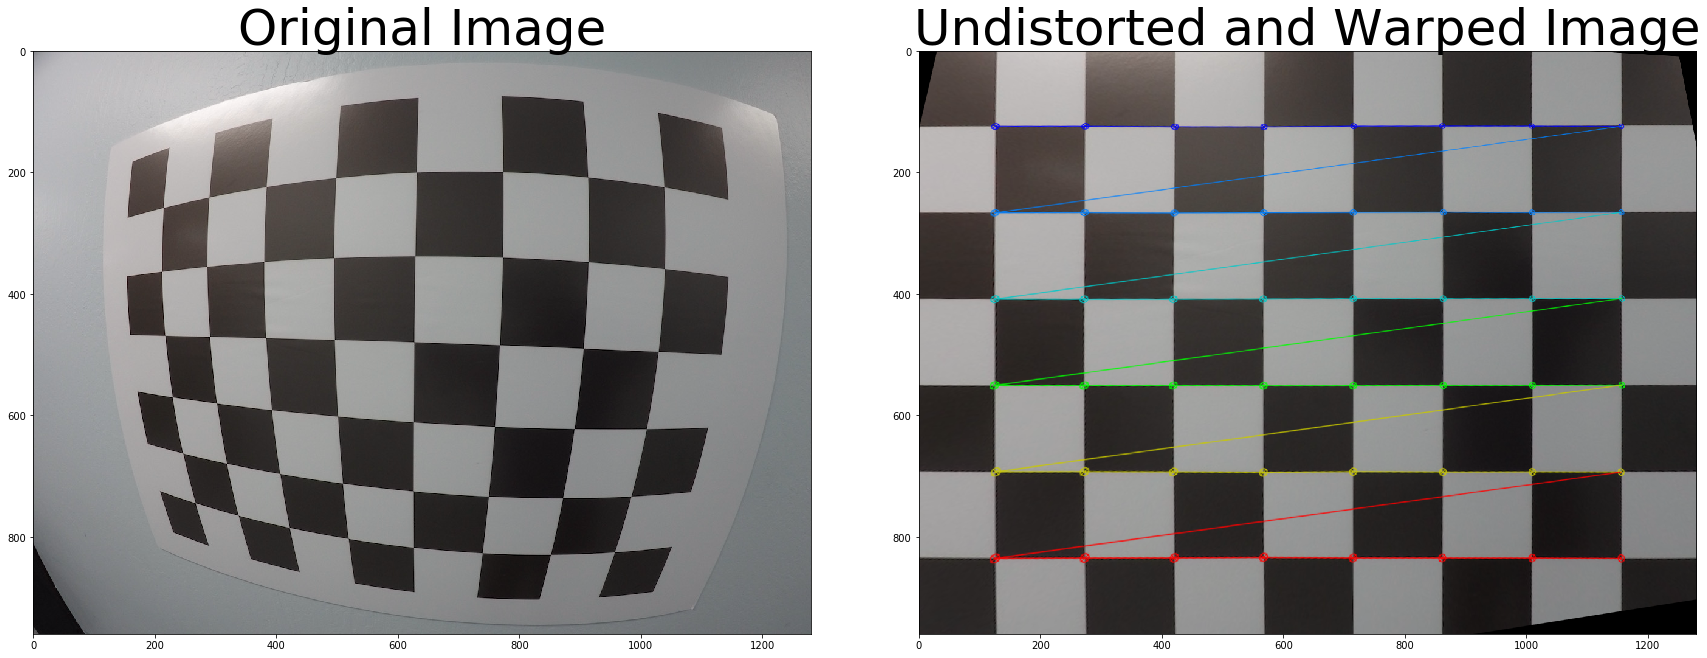

In [53]:
# The value of camera matrix and the value of distortion coefficients was calculated 
# with (Distortion-Correction) note book
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
# "rb": read bites 
dist_pickle = pickle.load( open( "calibration_wide/wide_dist_pickle.p", "rb" ) )

# The camera matrix:
mtx = dist_pickle["mtx"]
# The distortion coefficients [k1 k2 r1 r2 k3]
dist = dist_pickle["dist"]


# Read in an image
img = cv2.imread('calibration_wide/GOPR0063.jpg')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # My choice of 100 pixels is not exact, but close enough for our purpose here   
    offset = 125# offset for dst points   
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    img_size = (gray.shape[1], gray.shape[0])
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None) 
    # 4) If corners found:
    if ret == True:
        # a) draw corners
        cv2.drawChessboardCorners(undist, (nx,ny), corners, ret)
        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
            #Note: you could pick any four of the detected corners 
            # as long as those four corners define a rectangle
            #One especially smart way to do this would be to use four well-chosen
            # corners that were automatically detected during the undistortion steps
            #We recommend using the automatic detection of corners in your code
        src = np.float32([corners[0],corners[nx-1],corners[-1],corners[-nx]])
        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # e) use cv2.warpPerspective() to warp your image to a top-down view
        #delete the next two lines
        warped = cv2.warpPerspective(undist, M, img_size)
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


Show the used Rectangle

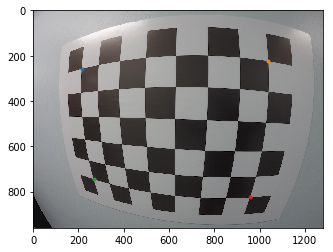

In [39]:
%matplotlib inline
plt.imshow(img)
plt.plot(corners[0][0][0],corners[0][0][1],'.') # top right
plt.plot(corners[nx-1][0][0],corners[nx-1][0][1],'.') # top right
plt.plot(corners[-nx][0][0],corners[-nx][0][1],'.') # bottom lift
plt.plot(corners[-1][0][0],corners[-1][0][1],'.') # bottom right